This is not to be uploaded.

In [1]:
# Import libraries
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = 'flower-images'
flowers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [3]:
dls = flowers.dataloaders(path)

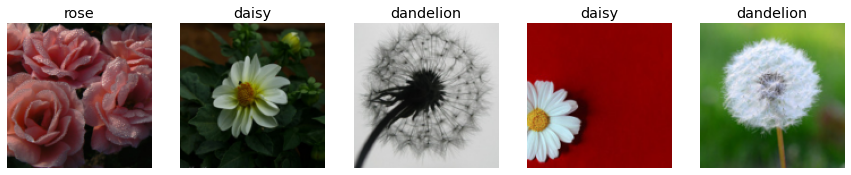

In [4]:
dls.valid.show_batch(max_n=5, nrows=1)

In [5]:
flowers = flowers.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = flowers.dataloaders(path, num_workers=0)

In [6]:
# Start the learning
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.999013,0.464098,0.129630,00:36


epoch,train_loss,valid_loss,error_rate,time
0,0.479916,0.347203,0.094907,00:38
1,0.379974,0.357987,0.092593,00:39
2,0.289069,0.341860,0.087963,00:38
3,0.218107,0.374923,0.097222,00:38
4,0.165467,0.300915,0.074074,00:39
5,0.122266,0.334178,0.070602,00:39
6,0.094962,0.291325,0.065972,00:39
7,0.074994,0.282857,0.061343,00:40
8,0.059972,0.271593,0.059028,00:38
9,0.056880,0.271023,0.061343,00:38


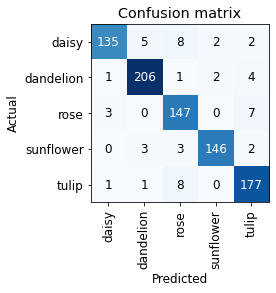

In [7]:
# Display confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

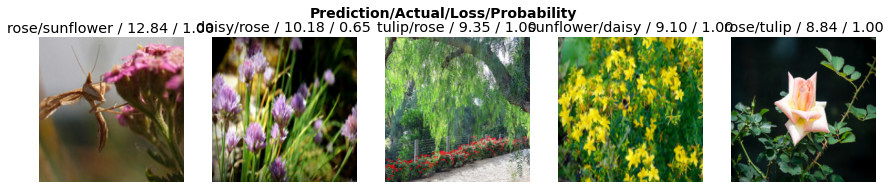

In [8]:
# Show top losses
interp.plot_top_losses(5, nrows=1)

In [9]:
# Show cleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
# Do cleaning
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [11]:
# Export pre-trained model
learn.export()

In [12]:
# Check for exported model
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]